In [1]:
'C:/Users/himan/Documents/Books/Coding Project/Version 1/Databases/Datasets List1/KAGGLE/Bike dataset uncleaned/archive/uncleaned bike sales data.csv'

'C:/Users/himan/Documents/Books/Coding Project/Version 1/Databases/Datasets List1/KAGGLE/Bike dataset uncleaned/archive/uncleaned bike sales data.csv'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

## Getting the data

In [3]:
data = pd.read_csv('C:/Users/himan/Documents/Books/Coding Project/Version 1/Databases/Datasets List1/KAGGLE/Bike dataset uncleaned/archive/uncleaned bike sales data.csv')

##  Dataframe's structure

- The dataset has 89 observations over 19 variables
- Out of the 19 variables:
    - 14 are categorical
    - 3 are countable
    - 2 are continuous
    
- 4 columns contain null values
- Column names have spaces in disguise
- Date column is of type object, instead of datetime; Day is of type float; Month is an object
- Order quantity is a continuous variable
- Unit_Cost, Unit_Price, Profit, Cost, Revenue are object types which is unnatural to their nature
- Profit, Cost, Revenue can be derived from Order_Quantity, Unit_Cost, Unit_Price

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sales_Order #        89 non-null     int64  
 1   Date                 89 non-null     object 
 2   Day                  88 non-null     float64
 3   Month                89 non-null     object 
 4   Year                 89 non-null     int64  
 5   Customer_Age         89 non-null     int64  
 6   Age_Group            88 non-null     object 
 7   Customer_Gender      89 non-null     object 
 8   Country              89 non-null     object 
 9   State                89 non-null     object 
 10  Product_Category     89 non-null     object 
 11  Sub_Category         89 non-null     object 
 12  Product_Description  88 non-null     object 
 13  Order_Quantity       88 non-null     float64
 14   Unit_Cost           89 non-null     object 
 15   Unit_Price          89 non-null     objec

# View of the data

- The view shows that the continuous variables contain '$' and ',' symbol with their values, hence are detected as object not float.

In [5]:
display(data.head())
# data.tail() #remove the leading hash for peeking the tail

,Sales_Order #,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product_Description,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,261695,01-12-2021,1.0,December,2021,39,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",4.0,"$1,252.00","$2,295.00","$4,172.00","$5,008.00","$9,180.00"
1,261695,01-12-2021,1.0,December,2021,44,Adults (35-64),M,United Kingdom,England,Bikes,Mountain Bikes,"Mountain-200 Silver, 42",1.0,"$1,266.00","$2,320.00","$1,054.00","$1,266.00","$2,320.00"
2,261697,02-12-2021,2.0,December,2021,37,Adults (35-64),M,United States,California,Bikes,Mountain Bikes,"Mountain-400-W Silver, 46",2.0,$420.00,$769.00,$698.00,$840.00,"$1,538.00"
3,261698,02-12-2021,2.0,December,2021,31,Young Adults (25-34),F,Australia,New South Wales,Bikes,Mountain Bikes,"Mountain-400-W Silver, 42",1.0,$420.00,$769.00,$349.00,$420.00,$769.00
4,261699,03-12-2021,3.0,December,2021,37,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",2.0,$0.00,"$2,295.00","$2,086.00",$0.00,"$4,590.00"


### Peeking rows with NaN values

In [6]:
display(data[data.isna().any(axis = 1)])
data.at[22, 'Order_Quantity']

,Sales_Order #,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product_Description,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
10,261704,05-12-2021,NaN,December,2021,42,Adults (35-64),M,Germany,Nordrhein-Westfalen,Bikes,Mountain Bikes,"Mountain-200 Black, 38",4.0,"$1,252.00","$2,295.00","$4,172.00","$5,008.00","$9,180.00"
15,261709,06-12-2021,6.0,December,2021,36,NaN,M,Australia,New South Wales,Bikes,Mountain Bikes,"Mountain-200 Black, 42",1.0,"$1,252.00","$2,295.00","$1,043.00","$1,252.00","$2,295.00"
21,261715,08-12-2021,8.0,December,2021,39,Adults (35-64),F,United States,Oregon,Bikes,Mountain Bikes,NaN,2.0,"$1,252.00","$2,295.00","$2,086.00","$2,504.00","$4,590.00"
22,261716,08-12-2021,8.0,December,2021,35,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-500 Black, 42",NaN,$295.00,$540.00,$245.00,$0.00,$0.00


nan

# Date Cleaning

### Column names space removal
- Leading trailing spaces removed from column names

### Deleting rows with NaN
- 4 rows out of the 89 are deleted for containing a NaN value
- resetting the index to account for the deleted rows, by default the index doesn't change even when rows are deleted  
        
                - Day: 1 missing value
                - Age_Group: 1 missing value
                - Product_Description: 1 missing value
                - Order_Quantity: 1 missing value

### Dropping Redundant Columns
- Sales order numbers are redundant
- Day, Month, Year can easily be extracted from Date column, hence, drop them

### Setting the appropriate types for columns
- Date is converted to 'datetime'
- Order_Quantity to 'int'
- Unit_Cost, Unit_Price are converted to 'float'

### Making derivable columns dynamic
- Profit, Cost, Revenue can be derived from Unit_Cost, Unit_Price, Order_Quantity but they are static for now, let's make them dynamic

### Later Detections
- As I began EDA, assuming the data is cleaned up, I encountered extra spaces in country names that repeated United States thrice.
- Then I started analyzing data for inaccuracies in every nook and cranny, and discovered a mountain of clutter.
<br>

- This dataset is all about bikes, hence the Product_Category column has only one value -'bike'.
- The Sub_Category column also contains a single value 'Mountain_bike', so the data is all about mountain bikes
- Let's drop these two columns.
<br>

- Product_Description contains some variables that might add granularity to our analysis, therefore, created three additional columns out of it -Variant, Color, Frame_Size.
- Browsing out the internet, I found the number in product description is frame size, so we named the third column Frame_Size.
<br>

- The Customer_Age column is of type 'int64', which is aritificial as Pandas always optimize the datatype, so let us set it to int explicitly so that pandas can optimize the int size.


In [7]:
data.columns = data.columns.str.strip()            # column names leading trailing spaces removal


data.drop(columns = ['Sales_Order #', 'Day', 'Month', 'Year'], axis = 1, inplace = True)            # redundant columns removed

data['Date'] = pd.to_datetime(data['Date'], dayfirst = True)             # convert Date to datetime type


data.at[15, 'Age_Group'] = 'Adults (35-64)'

data.at[22, 'Order_Quantity'] = 1
data['Order_Quantity'] = data['Order_Quantity'].astype('int')           # convert order quantity from float to int


cols = ['Unit_Cost', 'Unit_Price']                            # converting float natured columns to float after removing $ and ',' symbols
for col in cols:
    data[col] = data[col].astype('str').str.replace('$', '', regex = False).str.replace(',', '', regex = False).astype('float')
    
    
data.drop(columns = ['Profit', 'Cost', 'Revenue'], axis = 1, inplace = True)               # remove static derivable columns and make them dynamic
data['Cost'] = data['Unit_Cost']*data['Order_Quantity']                                             # making columns dynamic prevents errors, but has some computational overhead
data['Revenue'] = data['Order_Quantity'] * data['Unit_Price']                                    # here the data is not large, so computational overhead isn't that noticeable
data['Profit'] = data['Revenue'] - data['Cost']


                                                  # Later detections 

data['Country'] = data['Country'].str.strip().str.replace(r'\s+', ' ', regex = True)        # removing leading, trailing, between spaces from country names

data.drop(columns = ['Product_Category', 'Sub_Category'], axis = 1, inplace = True)             # dropping the redundant columns containing a single value

data[['Variant', 'Color', 'Frame_Size']] = data['Product_Description'].str.extract(r'(\w+-\d+-?\w*?) ([a-zA-Z]+), (\d+)')   # product description separated into three columns


data['Customer_Age'] = data['Customer_Age'].astype('int')              # data_type was hardcoded, made it flexible


data = data.dropna()             # deleting rows with NaN

data.reset_index(inplace = True)             # resetting index for accomodating deleted rows
data.drop(columns = 'index', inplace = True)             # dropping old index which now has become a column after resetting
 
display(data.info())
display(data.head())
display(data.isna().any(axis = 1).any())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 88 non-null     datetime64[ns]
 1   Customer_Age         88 non-null     int32         
 2   Age_Group            88 non-null     object        
 3   Customer_Gender      88 non-null     object        
 4   Country              88 non-null     object        
 5   State                88 non-null     object        
 6   Product_Description  88 non-null     object        
 7   Order_Quantity       88 non-null     int32         
 8   Unit_Cost            88 non-null     float64       
 9   Unit_Price           88 non-null     float64       
 10  Cost                 88 non-null     float64       
 11  Revenue              88 non-null     float64       
 12  Profit               88 non-null     float64       
 13  Variant              88 non-null     

None

,Date,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Description,Order_Quantity,Unit_Cost,Unit_Price,Cost,Revenue,Profit,Variant,Color,Frame_Size
0,2021-12-01,39,Adults (35-64),F,United States,California,"Mountain-200 Black, 46",4,1252.0,2295.0,5008.0,9180.0,4172.0,Mountain-200,Black,46
1,2021-12-01,44,Adults (35-64),M,United Kingdom,England,"Mountain-200 Silver, 42",1,1266.0,2320.0,1266.0,2320.0,1054.0,Mountain-200,Silver,42
2,2021-12-02,37,Adults (35-64),M,United States,California,"Mountain-400-W Silver, 46",2,420.0,769.0,840.0,1538.0,698.0,Mountain-400-W,Silver,46
3,2021-12-02,31,Young Adults (25-34),F,Australia,New South Wales,"Mountain-400-W Silver, 42",1,420.0,769.0,420.0,769.0,349.0,Mountain-400-W,Silver,42
4,2021-12-03,37,Adults (35-64),F,United States,California,"Mountain-200 Black, 46",2,0.0,2295.0,0.0,4590.0,4590.0,Mountain-200,Black,46


False

### Version 1

**Now the data is cleaned up.**

- The cleaned up dataset has:
    - 1 date and time variable
    - 5 continuous variables
    - 2 counting variables - 'int'
    - 8 categorical variables
    - A total 85 observations over 18 variables

**Lets embark on the exploration adventure**

### Version 2

**Now the data is cleaned up.**

- The cleaned up dataset has:
    - 1 date and time variable
    - 5 continuous variables
    - 2 counting variables - 'int'
    - 8 categorical variables
    - A total 85 observations over 16 variables


- All in all, we deleted:
    - Sales_Order #, Day, Month, Year, Product_Category, Sub_Category [6 columns]  
    and created:
    - Variant, Color, Frame_Size [3 columns]

**Lets embark on the exploration adventure**

# Exploratory Data Analysis

### A summary of numerical columns

In [8]:
data.describe()

,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Cost,Revenue,Profit
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.00000,88.000000
mean,34.147727,2.113636,1049.977273,1936.920455,2204.181818,4043.87500,1839.693182
std,8.120557,1.245053,442.499561,793.565115,1735.937380,3149.78078,1480.699426
min,17.000000,1.000000,0.000000,0.000000,0.000000,0.00000,-1680.000000
25%,29.750000,1.000000,420.000000,1913.500000,1252.000000,2295.00000,1043.000000
50%,35.000000,2.000000,1252.000000,2295.000000,1266.000000,2320.00000,1054.000000
75%,38.000000,3.000000,1266.000000,2320.000000,3756.000000,6783.75000,3129.000000
max,63.000000,4.000000,1912.000000,3400.000000,7592.000000,13500.00000,5908.000000


- most customers are 25-45 years in age
- most customers buy only 1 bike
- most bikes cost around \\$1300
- most bikes are priced around \\$2400
- as most customers buy only 1 bike, therefore, Cost and Revenue have largely a similar distribution to Unit cost and Unit price but they have larger outliers because of some multiple quantity orders
- profits are mostly packed around 300-1000 dollars

### Distribution of Numerical Variables

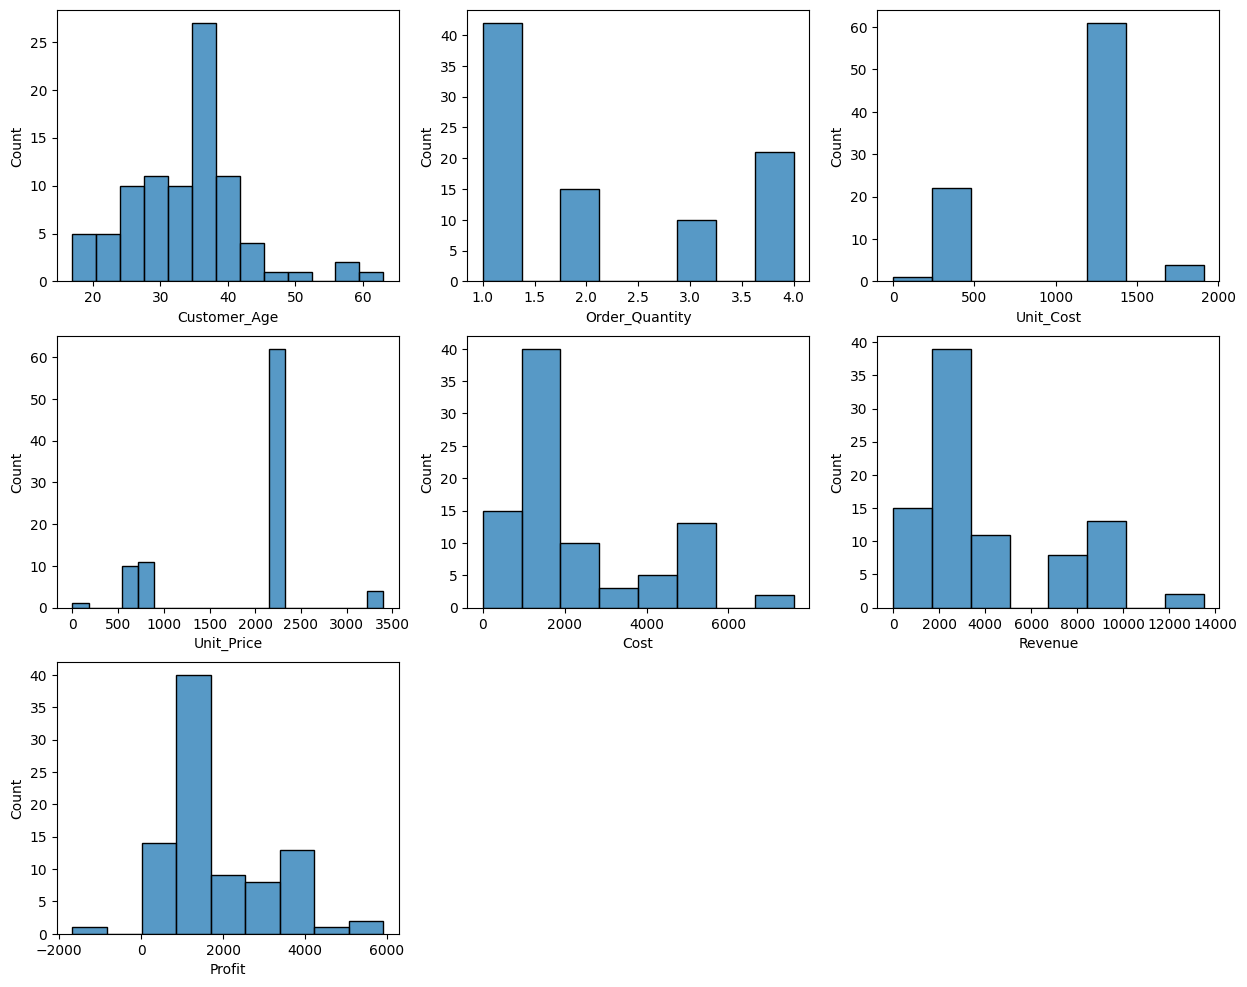

In [9]:
cols = data.select_dtypes(include = ['float', 'int']).columns.tolist()

plt.figure(figsize = (15, 12))
num = 1
for col in cols:
    plt.subplot(3,3, num)
    sns.histplot(data[col])
    num += 1
    
plt.show()

#### Aggregates

**Total Cost** = \$187,413  
**Total Revenue** = \$343,846  
**Total Profit** = \$156,433

- further information is self-evident in above describe() function

In [10]:

total_cost = data['Cost'].sum()
total_revenue = data['Revenue'].sum()
total_profit = data['Profit'].sum()
unit_profit = data['Unit_Price'] - data['Unit_Cost']
    
print('Total Cost =', total_cost)
print('Total Revenue =', total_revenue)
print('Total Profit =', total_profit)

Total Cost = 193968.0
Total Revenue = 355861.0
Total Profit = 161893.0


### Summary of categorical variables

In [11]:
print('DISTINCT VALUES OF CATEGORICAL VARIABLES:', '\n')

print('Countries:', data['Country'].unique(), '\n')

print('States:', data['State'].unique(), '\n')

print('Customer Gender:',data['Customer_Gender'].unique(), '\n')

print('Age Groups:', data['Age_Group'].unique(), '\n')

print('Variants:', data['Variant'].unique(), '\n')

print('Color:', data['Color'].unique(), '\n')

print('Frame Sizes:', data['Frame_Size'].unique(), '\n')

display(data.describe(include = 'object'))

DISTINCT VALUES OF CATEGORICAL VARIABLES: 

Countries: ['United States' 'United Kingdom' 'Australia' 'Germany' 'Canada' 'France'] 

States: ['California' 'England' 'New South Wales' 'Washington'
 'Nordrhein-Westfalen' 'Queensland' 'British Columbia' 'Victoria'
 'Hamburg' 'Seine (Paris)' 'Seine et Marne' 'Seine Saint Denis' 'Nord'
 'Oregon' 'South Australia' 'Hessen' 'Somme'] 

Customer Gender: ['F' 'M'] 

Age Groups: ['Adults (35-64)' 'Young Adults (25-34)' 'Youth (<25)'] 

Variants: ['Mountain-200' 'Mountain-400-W' 'Mountain-500' 'Mountain-100'] 

Color: ['Black' 'Silver'] 

Frame Sizes: ['46' '42' '38' '40' '44' '48' '52'] 



,Age_Group,Customer_Gender,Country,State,Product_Description,Variant,Color,Frame_Size
count,88,88,88,88,88,88,88,88
unique,3,2,6,17,18,4,2,7
top,Adults (35-64),F,United States,California,"Mountain-200 Black, 46",Mountain-200,Black,38
freq,47,49,32,20,15,62,44,31


### Distribution of Categorical Variables

['Age_Group', 'Customer_Gender', 'Country', 'Variant', 'Color', 'Frame_Size']

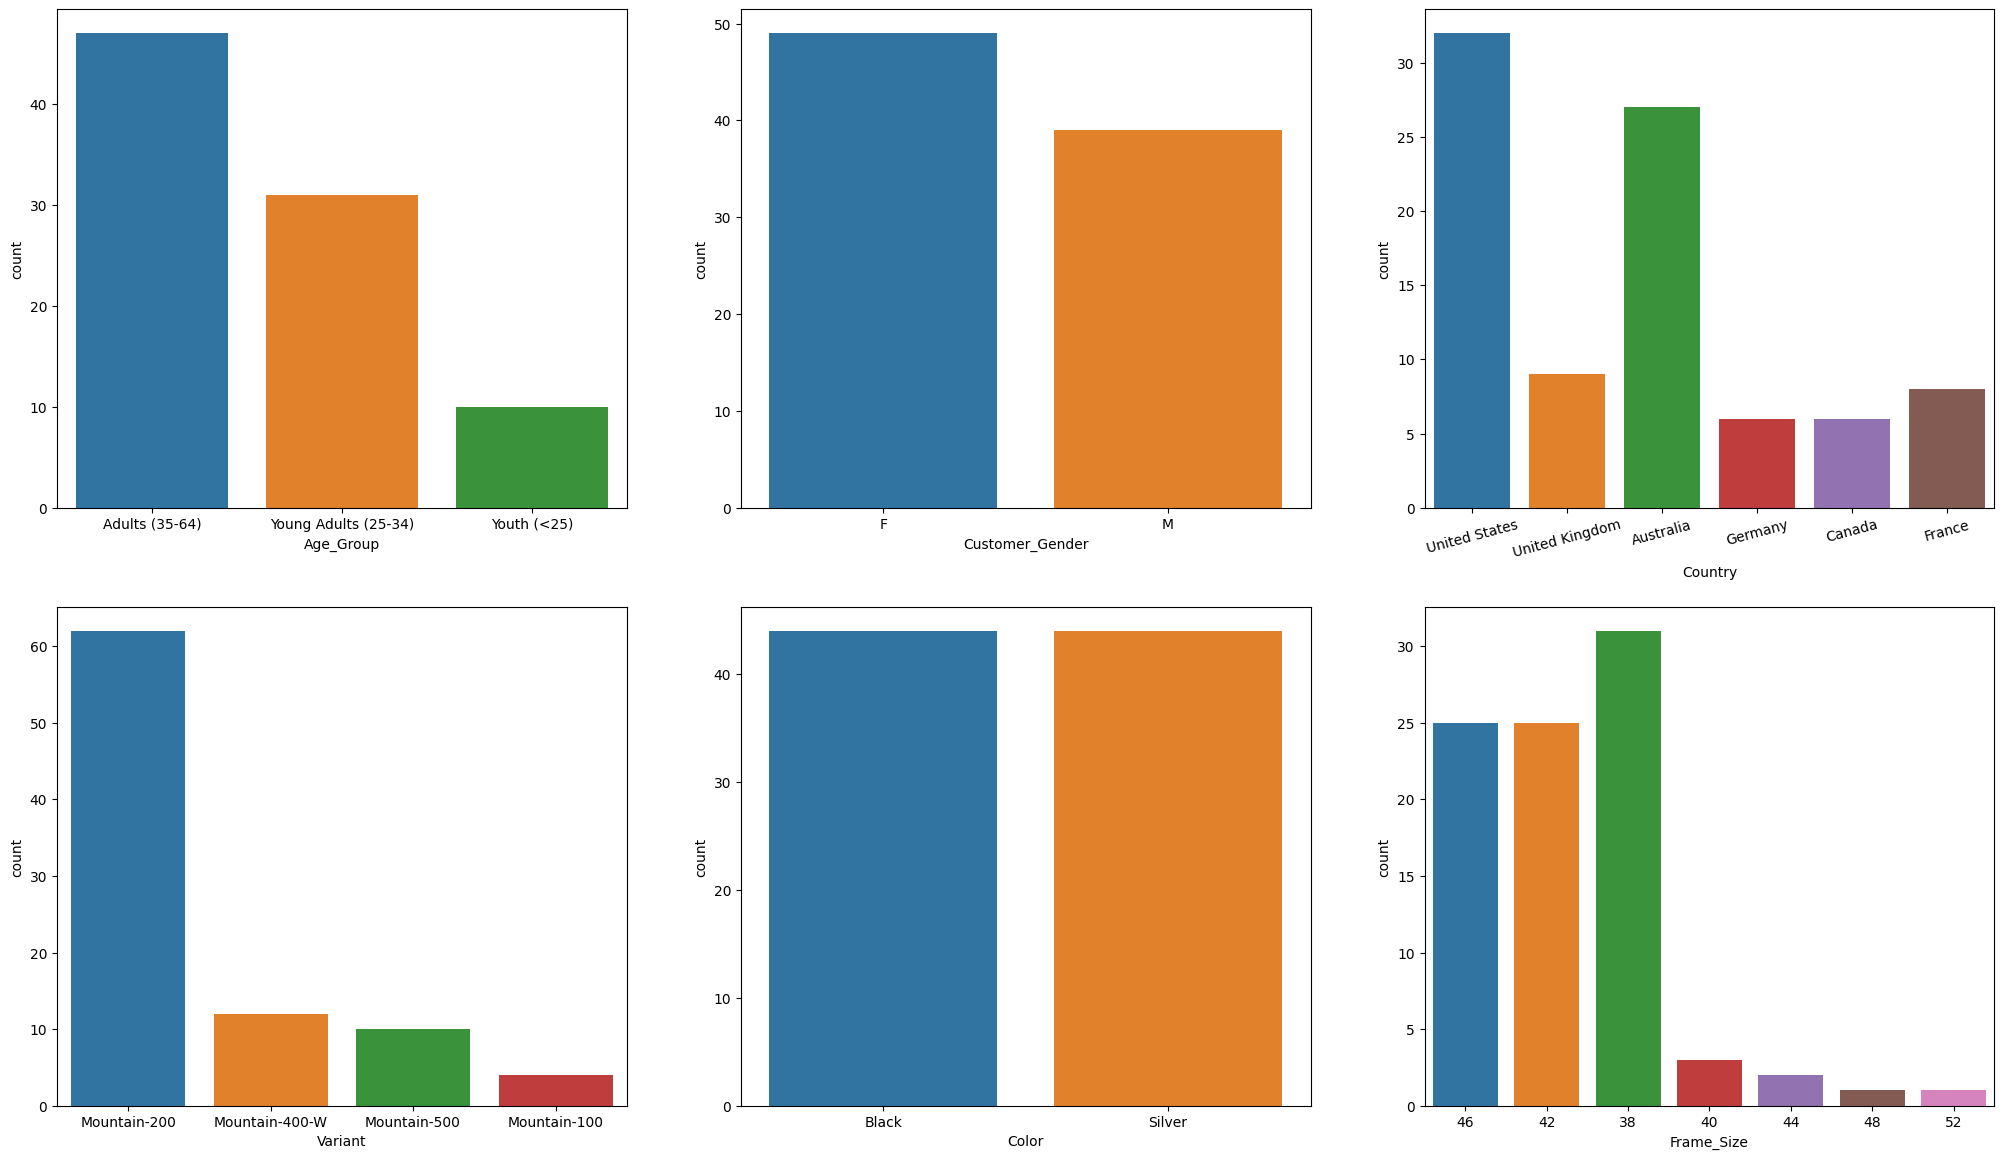

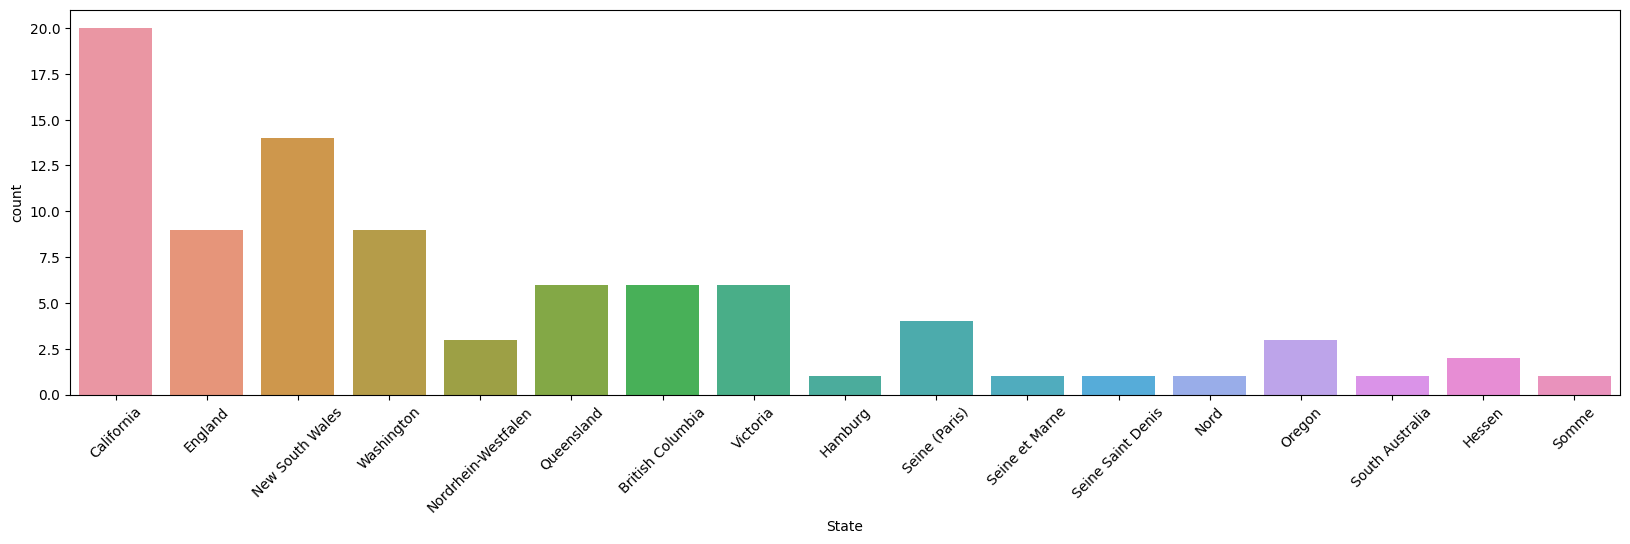

In [12]:
cat = data.select_dtypes(include = ['object']).columns.tolist()
cat.remove('Product_Description')
cat.remove('State')
display(cat)

plt.figure(figsize = (25, 22))     # a histogram for each categorical variable
num = 1
for col in cat:
        plt.subplot(3,3, num)
        sns.countplot(x = col, data = data)
        if num == 3:
            plt.xticks(rotation = 15)
        num += 1

plt.figure(figsize = (20,5))         # x labels are much lengthier so plotted separately
plt.subplot(1,1,1)
sns.countplot(x = 'State', data = data)
plt.xticks(rotation = 45)

plt.show()

## Sales & Quantity by Age Group

 - Considering sales alone might be ambiguous:  
    - The high sales can be because of higher quantity, or
    - the Adults might have bought more expensive bikes than other groups with lower sales
 - Therefore, considering sales and quantity explicitly shows us that
    - Adults have bought more quantity and thereby provided more sales.

,Age_Group,Revenue
0,Adults (35-64),203961.0
1,Young Adults (25-34),116570.0
2,Youth (<25),35330.0


,Age_Group,Order_Quantity
0,Adults (35-64),98
1,Young Adults (25-34),61
2,Youth (<25),27


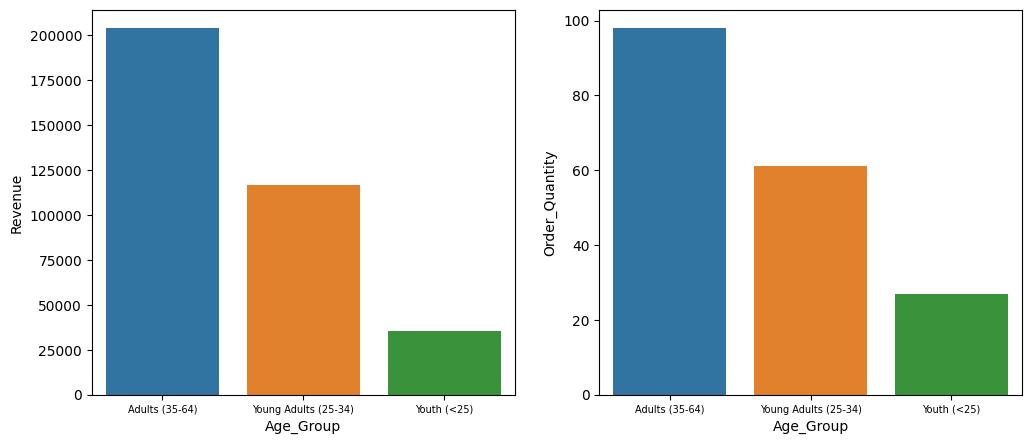

In [13]:
sales_by_age_group = data.groupby('Age_Group')['Revenue'].sum().reset_index()
quantity_by_age_group = data.groupby('Age_Group')['Order_Quantity'].sum().reset_index()
display(sales_by_age_group)
display(quantity_by_age_group)

plt.figure(figsize = (12, 5))
plt.subplot(1,2,1)
sns.barplot(data = sales_by_age_group, x = 'Age_Group', y = 'Revenue')
plt.xticks(fontsize = 7)

plt.subplot(1,2,2)
sns.barplot(data = quantity_by_age_group, x = 'Age_Group', y = 'Order_Quantity')
plt.xticks(fontsize = 7)

plt.show()

# Sales & Quantity by Gender

,Customer_Gender,Revenue
0,F,208383.0
1,M,147478.0


,Customer_Gender,Order_Quantity
0,F,106
1,M,80


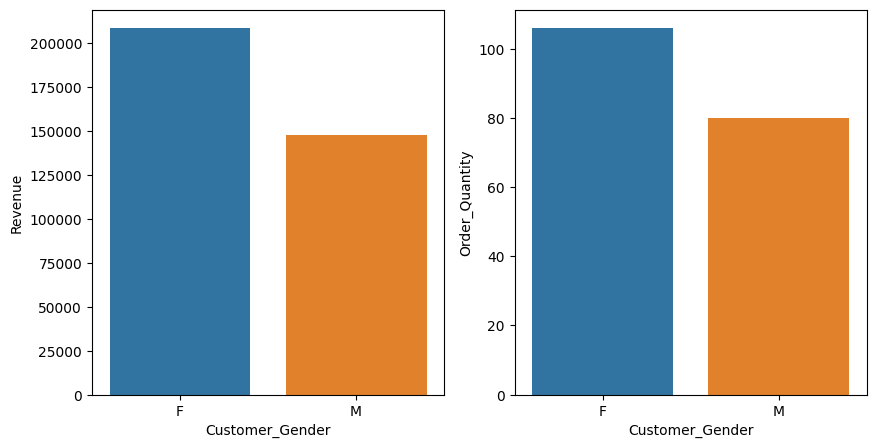

In [14]:
sales_gender = data.groupby('Customer_Gender')['Revenue'].sum().reset_index()    # sum of sales by gender
quantity_gender = data.groupby('Customer_Gender')['Order_Quantity'].sum().reset_index()      # sum of quantity by gender
display(sales_gender)
display(quantity_gender)

plt.figure(figsize = (10, 5))

plt.subplot(1,2,1)
sns.barplot(data = sales_gender,
           x = 'Customer_Gender',
           y = 'Revenue')

plt.subplot(1,2,2)
sns.barplot(data = quantity_gender,
           x = 'Customer_Gender',
           y = 'Order_Quantity')

plt.show()

## Sales & Quantity by Country

- The distributions are identical because they are Revenue is a multiple of Order_Quantity, that is, $Revenue = Quantity \times Price$

,Country,Revenue
0,Australia,108430.0
1,Canada,20080.0
2,France,46175.0
3,Germany,30010.0
4,United Kingdom,19972.0
5,United States,131194.0


,Country,Order_Quantity
0,Australia,63
1,Canada,11
2,France,20
3,Germany,13
4,United Kingdom,14
5,United States,65


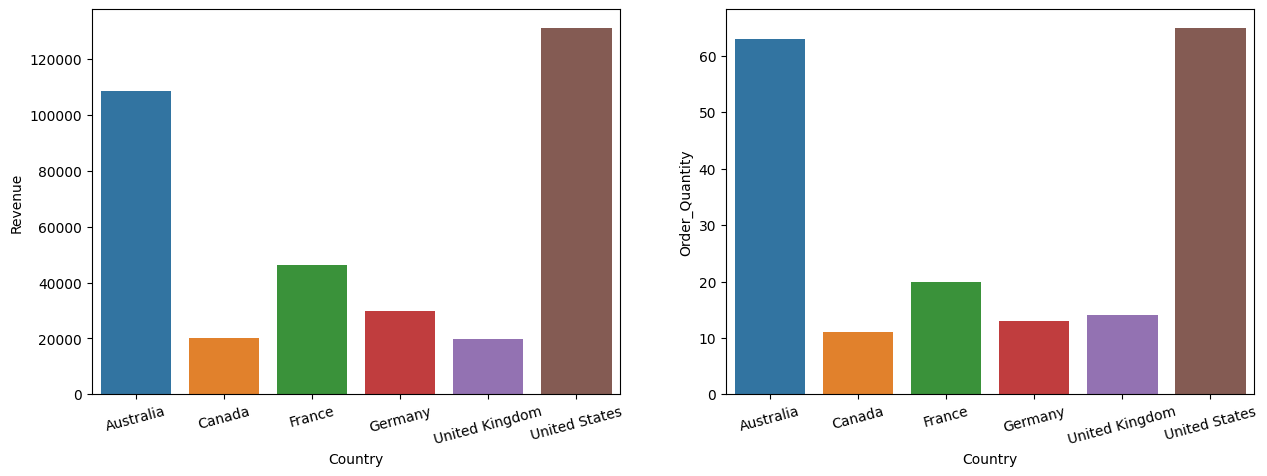

In [15]:
sales_country = data.groupby('Country')['Revenue'].sum().to_frame().reset_index()
quantity_country = data.groupby('Country')['Order_Quantity'].sum().to_frame().reset_index()
display(sales_country, quantity_country)

plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.barplot(data = sales_country,
             x = 'Country',
             y = 'Revenue')
plt.xticks(rotation = 15)

plt.subplot(1,2,2)
sns.barplot(data = quantity_country,
           x = 'Country',
           y = 'Order_Quantity')
plt.xticks(rotation = 15)


plt.show()

## Sales & Quantity by Color

,Color,Revenue
0,Black,212355.0
1,Silver,143506.0


,Color,Order_Quantity
0,Black,97
1,Silver,89


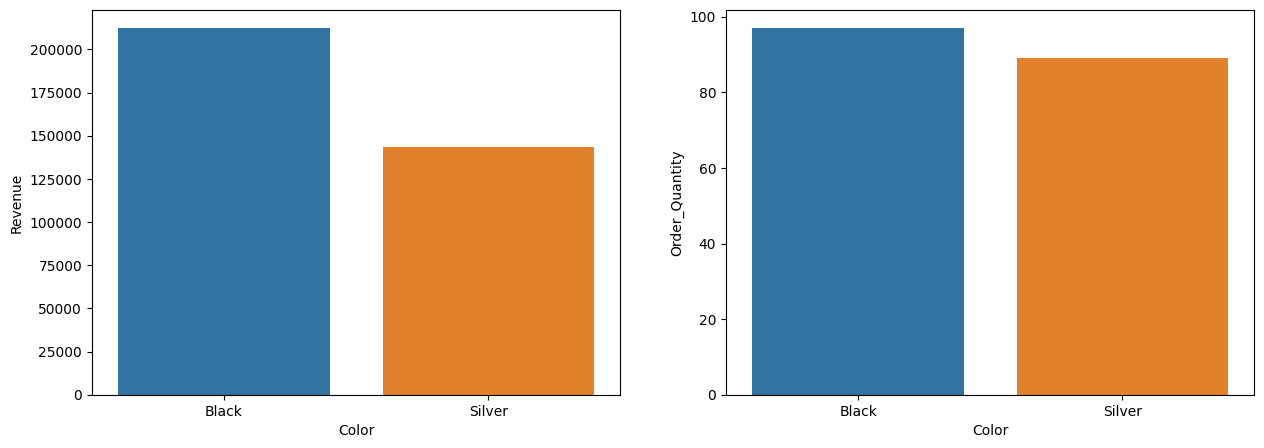

In [16]:
sales_color = data.groupby('Color')['Revenue'].sum().to_frame().reset_index()
quantity_color = data.groupby('Color')['Order_Quantity'].sum().to_frame().reset_index()

display(sales_color, quantity_color)

plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.barplot(data = sales_color,
           x = 'Color',
           y = 'Revenue')

plt.subplot(1,2,2)
sns.barplot(data = quantity_color,
           x = 'Color',
            y = 'Order_Quantity')

plt.show()

## Sales & Quantity by Variant

- The distribution shows that 400 and 500 have sold more quantities still have less Revenue than 100, therefore, Mountain-100 is more expensive than the two of them


,Variant,Revenue
0,Mountain-100,37150.0
1,Mountain-200,288125.0
2,Mountain-400-W,18456.0
3,Mountain-500,12130.0


,Variant,Order_Quantity
0,Mountain-100,11
1,Mountain-200,125
2,Mountain-400-W,28
3,Mountain-500,22


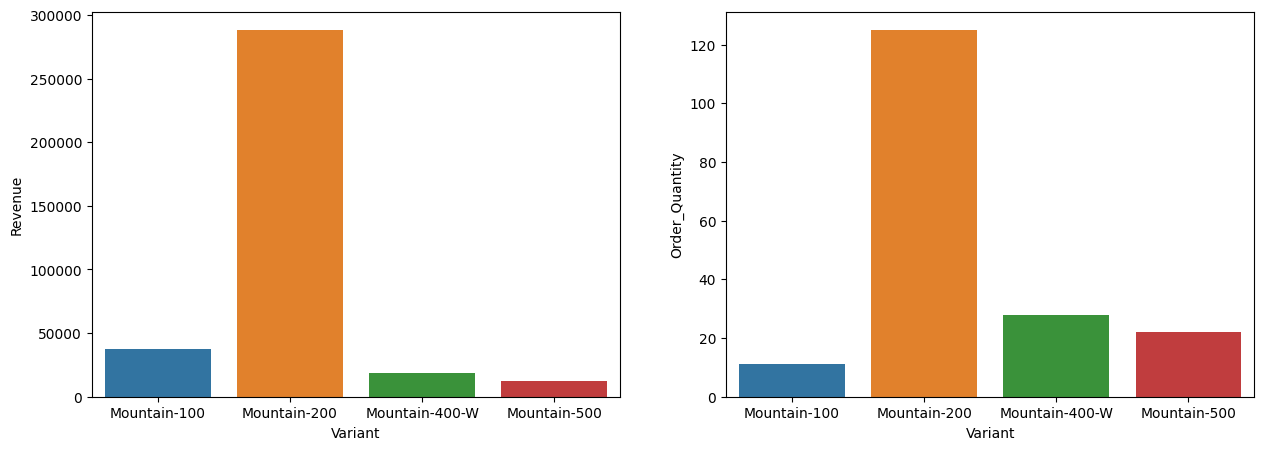

In [17]:
sales_variant = data.groupby('Variant')['Revenue'].sum().to_frame().reset_index()
quantity_variant = data.groupby('Variant')['Order_Quantity'].sum().to_frame().reset_index()

display(sales_variant, quantity_variant)

plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.barplot(data = sales_variant,
              x = 'Variant',
              y ='Revenue')

plt.subplot(1,2,2)
sns.barplot(data = quantity_variant,
           x = 'Variant',
           y = 'Order_Quantity')

plt.show()

## Sales & Quantity by Frame Size

,Frame_Size,Revenue
0,38,144829.0
1,40,2185.0
2,42,81530.0
3,44,5560.0
4,46,106637.0
5,48,13500.0
6,52,1620.0


,Frame_Size,Order_Quantity
0,38,64
1,40,4
2,42,51
3,44,5
4,46,55
5,48,4
6,52,3


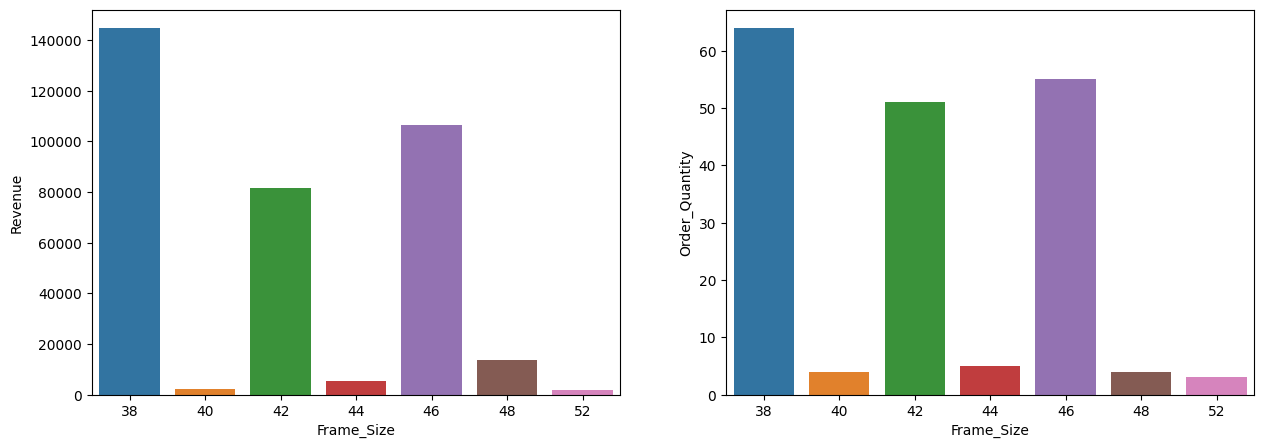

In [18]:
sales_frame = data.groupby('Frame_Size')['Revenue'].sum().to_frame().reset_index()
quantity_frame = data.groupby('Frame_Size')['Order_Quantity'].sum().to_frame().reset_index()

display(sales_frame, quantity_frame)

plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.barplot(data = sales_frame,
           x = 'Frame_Size',
           y = 'Revenue')

plt.subplot(1,2,2)
sns.barplot(data = quantity_frame,
           x = 'Frame_Size',
           y = 'Order_Quantity')

plt.show()

## Sales & Quantity by Country & States

,Country,State,Revenue
0,Australia,New South Wales,40391.0
1,Australia,Queensland,39140.0
2,Australia,South Australia,1080.0
3,Australia,Victoria,27819.0
4,Canada,British Columbia,20080.0
5,France,Nord,9280.0
6,France,Seine (Paris),20655.0
7,France,Seine Saint Denis,6960.0
8,France,Seine et Marne,2320.0
9,France,Somme,6960.0


,Country,State,Order_Quantity
0,Australia,New South Wales,31
1,Australia,Queensland,17
2,Australia,South Australia,2
3,Australia,Victoria,13
4,Canada,British Columbia,11
5,France,Nord,4
6,France,Seine (Paris),9
7,France,Seine Saint Denis,3
8,France,Seine et Marne,1
9,France,Somme,3


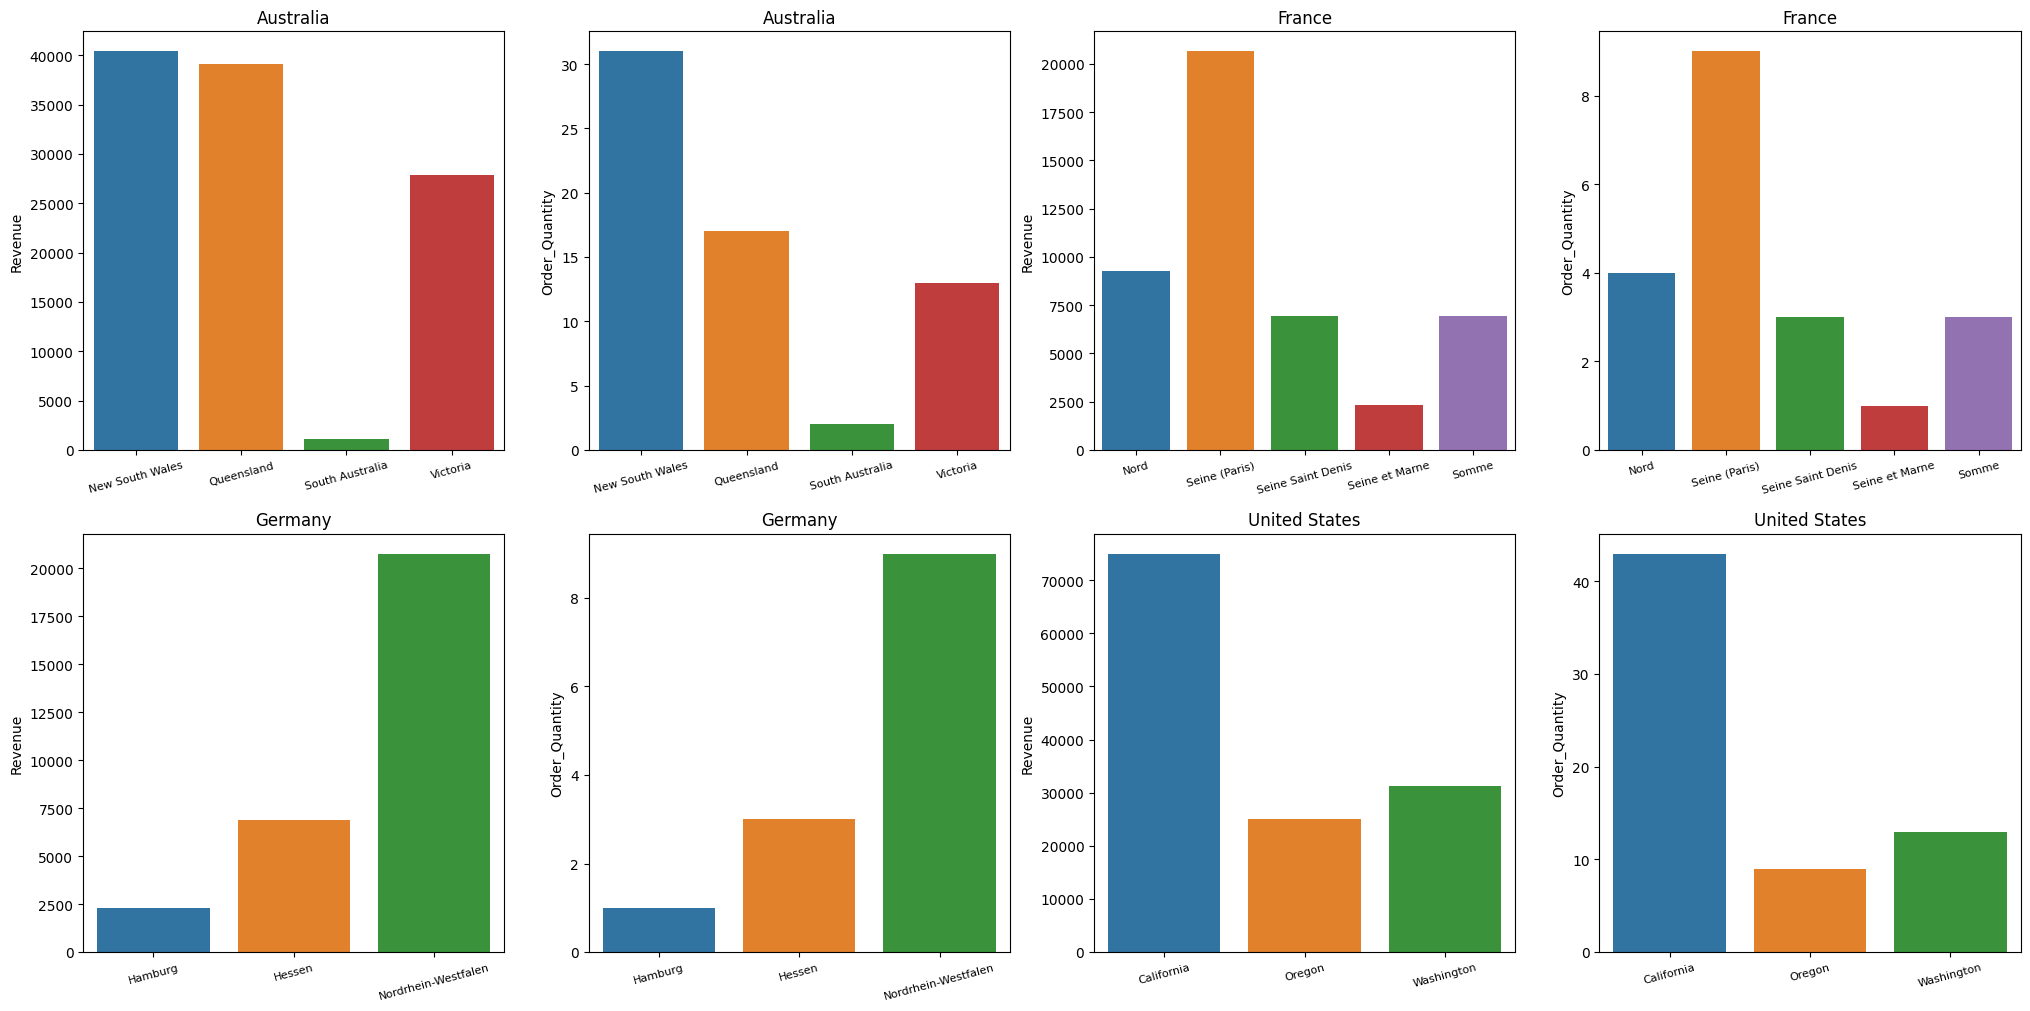

In [19]:
sales_state = data.groupby(['Country', 'State'])['Revenue'].sum().to_frame().reset_index()                       # revenue by country then states
quantity_state = data.groupby(['Country', 'State'])['Order_Quantity'].sum().to_frame().reset_index()       # quantity by country then states

display(sales_state)                                      # displaying the above tables
print('\n')
display(quantity_state)

unique_countries = sales_state['Country'].unique()          # unique countries list to iterate over
unique_states = sales_state['State'].unique()                      # unique states list to iterate over

plt.figure(figsize = (25,25))                                 # figure creation, then subplot creation by country name, first for sales of states of that country then for quantity
num = 1
for country in unique_countries:
    if country in ['Canada', 'United Kingdom']:
        continue
    plt.subplot(4,4,num)
    sns.barplot(data = sales_state[(sales_state['Country'] == country)],          # sales subplots by country
               x = 'State',
               y = 'Revenue')
    plt.title(country)
    plt.xlabel('')
    plt.xticks(rotation = 15, fontsize = 8)
    num += 1
    
    plt.subplot(4,4, num)
    sns.barplot(data = quantity_state[quantity_state['Country'] == country],         # quantity subplots by country
               x = 'State',
               y = 'Order_Quantity')
    plt.title(country)
    plt.xlabel('')
    plt.xticks(rotation = 15, fontsize = 8)
    num += 1
        
plt.show()

## Total Cost By Variants

,Variant,Cost
0,Mountain-100,20892.0
1,Mountain-200,154696.0
2,Mountain-400-W,11760.0
3,Mountain-500,6620.0


,Variant,Order_Quantity
0,Mountain-100,11
1,Mountain-200,125
2,Mountain-400-W,28
3,Mountain-500,22


,Variant,Unit_Price
0,Mountain-100,"[3375.0, 3400.0]"
1,Mountain-200,"[2295.0, 2320.0]"
2,Mountain-400-W,"[769.0, 0.0]"
3,Mountain-500,"[565.0, 540.0]"


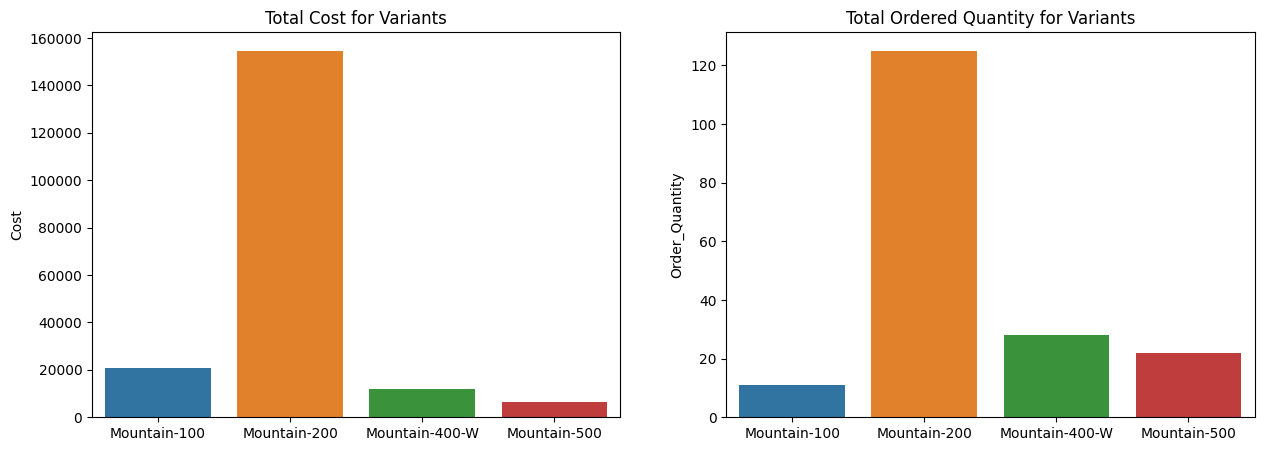

In [20]:
cost_variant = data.groupby('Variant')['Cost'].sum().to_frame().reset_index()                                      # group by Variant and sum cost then covert to dataframe

display(cost_variant, quantity_variant, data.groupby('Variant')['Unit_Price'].unique().to_frame().reset_index())    # display above table, also include variant to unit_price table

plt.figure(figsize = (15, 5))               # create figure for grouping plots
plt.subplot(1,2,1)
sns.barplot(data = cost_variant,            # variant-total_sales plot
           x = 'Variant',
           y = 'Cost')
plt.title('Total Cost for Variants')
plt.xlabel('')

plt.subplot(1,2,2)
sns.barplot(data =  quantity_variant,       # variant-total_quantity plot
            x = 'Variant',
            y = 'Order_Quantity')
plt.title('Total Ordered Quantity for Variants')
plt.xlabel('')

plt.show()

## Variants and Profits

,Variant,Profit
0,Mountain-100,16258.0
1,Mountain-200,133429.0
2,Mountain-400-W,6696.0
3,Mountain-500,5510.0


,Variant,Order_Quantity
0,Mountain-100,11
1,Mountain-200,125
2,Mountain-400-W,28
3,Mountain-500,22


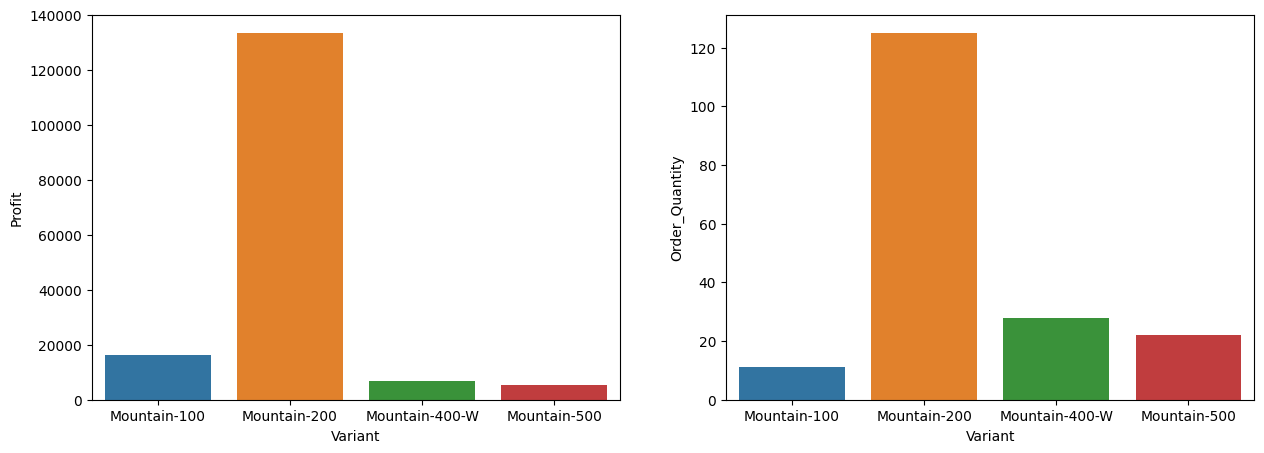

In [21]:
profits_variant = data.groupby('Variant')['Profit'].sum().to_frame().reset_index()      # group by variant and sum profit

display(profits_variant, quantity_variant)          # display variant-total_profit table, variant_total_quantity table is declared above

plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.barplot(data = profits_variant,
           x = 'Variant',
           y = 'Profit')

plt.subplot(1,2,2)
sns.barplot(data = quantity_variant,
           x = 'Variant',
           y = 'Order_Quantity')

plt.show()

# Variant preferred by Age Groups

Variant,Mountain-100,Mountain-200,Mountain-400-W,Mountain-500
Age_Group,,,,
Adults (35-64),1,38,4,4
Young Adults (25-34),3,20,6,2
Youth (<25),0,4,2,4


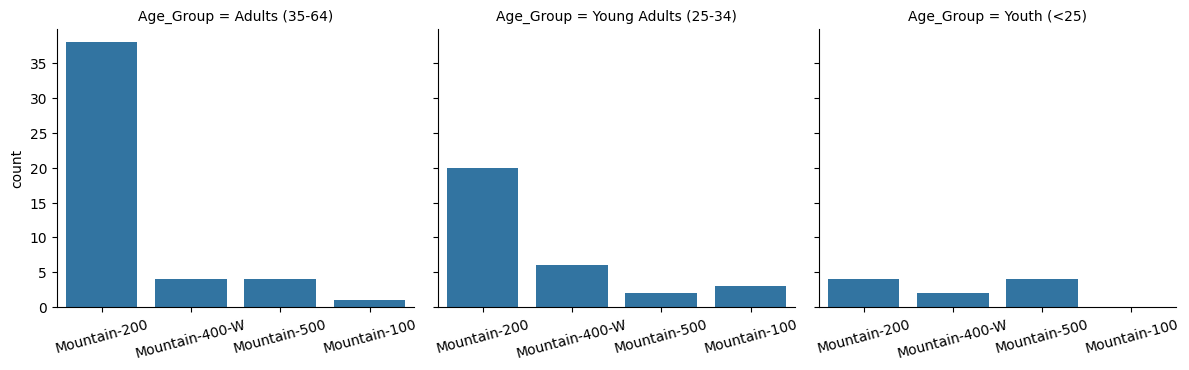

In [22]:
a = pd.crosstab(index = data['Age_Group'], columns = data['Variant'])
display(a)

g = sns.FacetGrid(data, col = 'Age_Group', col_wrap = 3, height = 4, sharex = False)
g = g.map(sns.countplot, 'Variant', order = data['Variant'].value_counts().index)
g.set_xticklabels(rotation = 15)
g.tight_layout()
g.set_axis_labels('')

plt.show()